In [10]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
import pytorch_lightning as pl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lightning.pytorch import loggers as pl_loggers

from dm_zoo.dff import *
from WD.datasets import WBXRDataset

In [11]:
val_ds = WBXRDataset(split="val")

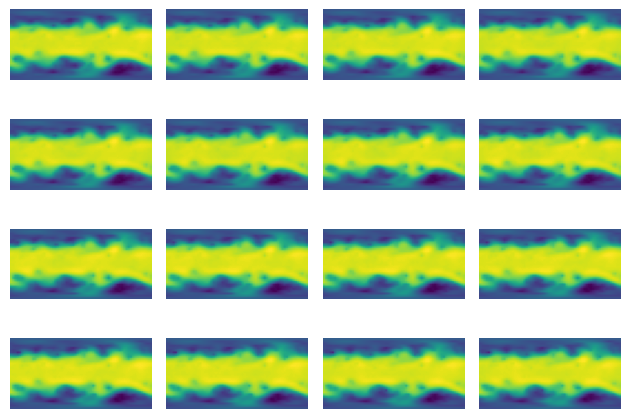

In [12]:
for idx in range(16):
    plt.subplot(4,4,1+idx)
    plt.imshow(val_ds[idx].permute(1,2,0))
    plt.axis('off')
plt.tight_layout()

In [13]:
model=PixelDiffusion(val_ds,
                     lr=1e-4,
                     batch_size=16)

Is Time embed used ?  True


In [14]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="/data/compoundx/ml_models/diffusion_models/logs/")

In [15]:
trainer = pl.Trainer(
    max_steps=2e5,
    callbacks=[EMA(0.9999)],
    limit_val_batches=0,
    logger=tb_logger
)

/gpfs0/home/anand/Projects/WeatherDiff/dm_zoo/dff/EMA.py:58: UserWarning: EMA has better performance when Apex is installed: https://github.com/NVIDIA/apex#installation.
  rank_zero_warn(
/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/anand/.conda/envs/TORCH311/lib/python3.11/site ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [17]:
trainer.fit(model)

Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/2
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
[W socket.cpp:426] [c10d] The server socket has failed to bind to [::]:40383 (errno: 98 - Address already in use).
[W socket.cpp:426] [c10d] The server socket has failed to bind to 0.0.0.0:40383 (errno: 98 - Address already in use).
[E socket.cpp:462] [c10d] The server socket has failed to listen on any local network address.


ProcessRaisedException: 

-- Process 0 terminated with the following error:
Traceback (most recent call last):
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/torch/multiprocessing/spawn.py", line 69, in _wrap
    fn(i, *args)
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/strategies/launchers/multiprocessing.py", line 147, in _wrapping_function
    results = function(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/trainer/trainer.py", line 559, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/trainer/trainer.py", line 893, in _run
    self.strategy.setup_environment()
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/strategies/ddp.py", line 142, in setup_environment
    self.setup_distributed()
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/pytorch_lightning/strategies/ddp.py", line 191, in setup_distributed
    _init_dist_connection(self.cluster_environment, self._process_group_backend, timeout=self._timeout)
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/lightning_fabric/utilities/distributed.py", line 245, in _init_dist_connection
    torch.distributed.init_process_group(torch_distributed_backend, rank=global_rank, world_size=world_size, **kwargs)
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/torch/distributed/distributed_c10d.py", line 888, in init_process_group
    store, rank, world_size = next(rendezvous_iterator)
                              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/torch/distributed/rendezvous.py", line 245, in _env_rendezvous_handler
    store = _create_c10d_store(master_addr, master_port, rank, world_size, timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anand/.conda/envs/TORCH311/lib/python3.11/site-packages/torch/distributed/rendezvous.py", line 176, in _create_c10d_store
    return TCPStore(
           ^^^^^^^^^
RuntimeError: The server socket has failed to listen on any local network address. The server socket has failed to bind to [::]:40383 (errno: 98 - Address already in use). The server socket has failed to bind to 0.0.0.0:40383 (errno: 98 - Address already in use).


In [8]:
B=8 # number of samples

out=model(batch_size=B,shape=(64,64),verbose=True)

diffusion sampling:  49%|████▉     | 491/1000 [12:40<14:08,  1.67s/it]

In [ ]:
for idx in range(out.shape[0]):
    plt.subplot(1,len(out),idx+1)
    plt.imshow(out[idx].detach().cpu().permute(1,2,0))
    plt.axis('off')